In [1]:
#задача1
import numpy as np
a=np.random.random((10,3))
print(a.flatten()[np.argmin(abs(a-0.5),axis=1)+np.arange(0,10*3,3)])



[0.59929228 0.64008987 0.35080757 0.86068018 0.74943059 0.53101806
 0.4931228  0.58483366 0.41918263 0.47090512]


In [2]:
#задача2
a=np.random.random((6,6))
print(np.sum(a,axis=1)/np.min(a,axis=0))

[32.11253649 18.33268643  9.52997106 36.50326619 19.09719357 21.52188012]


In [3]:
#задача3
x=np.array([6,2,0,3,0,0,5,7,0])
mask=x==0
print(x[1:][mask[:-1]].max())

5


In [4]:
#задача4
x=np.ones(10)
i=np.array([0,1,2,3,5,5,5,8])
print(x+np.bincount(i,minlength=10))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [5]:
import numpy as np
a=np.arange(16).reshape(4, 4)
d=dict()
d[0]=0
d[tuple(a.flatten()[1:4*1+1:3])]=a.flatten()[1]
d[tuple(a.flatten()[2:4*2+1:3])]=a.flatten()[2]
d[tuple(a.flatten()[3:4*3+1:3])]=a.flatten()[3]
d[tuple(a.flatten()[7:4*4+1:3])]=a.flatten()[1]
d[tuple(a.flatten()[1:4*1:3])]=a.flatten()[1]

print(d)

{0: 0, (1, 4): 1, (2, 5, 8): 2, (3, 6, 9, 12): 3, (7, 10, 13): 1, (1,): 1}


Clustering completed after 9 iterations


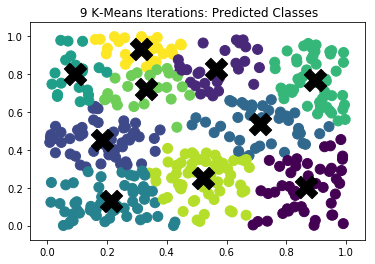

6.270210980922611e-05

In [11]:
X = np.random.rand(400, 2)


#Defining k-means function
def kmeans(X, k, itr, thresh):
    
    centroids = X[:k]
    
    for i in range(itr):
        labels = np.argmin(np.linalg.norm(X - centroids[:, None], axis=2), axis=0)
        
        new_centroids = np.array([X[labels==j, :].mean(axis=0) for j in range(k)])
        
        dist = ((new_centroids - centroids)**2).sum()
        
        if (dist <= thresh) or (new_centroids == centroids).all():
            break
        else:
            centroids = new_centroids
    else:
        raise RuntimeError(f"Clustering algorithm did not complete within {itr} iterations")
    
    print(f"Clustering completed after {i} iterations")
    return(centroids, dist, labels, i)

centroids, dist, labels, i = kmeans(X, 10, 100, 1e-04)       

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=X[:, 0], y=X[:, 1], s=100, c=labels)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=500, c='k', marker='X')
plt.title(f" {i} K-Means Iterations: Predicted Classes")
plt.show()

dist